## Faults in urban waste-water treatment plants!

### Relevant Information
#### This dataset comes from the daily measures of sensors in a urban waste 	
#### water treatment plant. The objective is to classify the operational	
#### state of the plant in order to predict faults through the state 	
#### variables of the plant at each of the stages of the treatment process. 	

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Loading Data

In [3]:
data = pd.read_csv('water_treatment.csv')

column_data = pd.read_csv('column_only.csv', header=None)

In [4]:
data.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [5]:
column_data.head()

,0
0,1. Title: Faults in a urban waste water treatm...
1,2. Relevant Information:\t
2,This dataset comes from the daily measures...
3,water treatment plant. The objective is to c...
4,state of the plant in order to predict fault...


In [7]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Date        0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64


In [6]:
data_types = data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
Date         object
Q-E          object
ZN-E         object
PH-E        float64
DBO-E        object
DQO-E        object
SS-E         object
SSV-E        object
SED-E        object
COND-E        int64
PH-P        float64
DBO-P        object
SS-P          int64
SSV-P        object
SED-P        object
COND-P        int64
PH-D        float64
DBO-D        object
DQO-D        object
SS-D         object
SSV-D        object
SED-D        object
COND-D        int64
PH-S         object
DBO-S        object
DQO-S        object
SS-S         object
SSV-S        object
SED-S        object
COND-S       object
RD-DBO-P     object
RD-SS-P      object
RD-SED-P     object
RD-DBO-S     object
RD-DQO-S     object
RD-DBO-G     object
RD-DQO-G     object
RD-SS-G      object
RD-SED-G     object
dtype: object


In [7]:
summary_statistics = data.describe()
print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
             PH-E       COND-E        PH-P         SS-P       COND-P  \
count  527.000000   527.000000  527.000000   527.000000   527.000000   
mean     7.810057  1478.620493    7.829981   253.952562  1496.034156   
std      0.246175   394.898019    0.226925   147.458468   402.588656   
min      6.900000   651.000000    7.300000   104.000000   646.000000   
25%      7.600000  1201.000000    7.700000   184.000000  1217.000000   
50%      7.800000  1406.000000    7.800000   220.000000  1420.000000   
75%      8.000000  1672.000000    8.000000   272.000000  1713.500000   
max      8.700000  3230.000000    8.500000  1692.000000  3170.000000   

             PH-D       COND-D  
count  527.000000   527.000000  
mean     7.811954  1490.569260  
std      0.199594   399.990816  
min      7.100000    85.000000  
25%      7.700000  1225.500000  
50%      7.800000  1428.000000  
75%      7.900000  1701.000000  
max      8.400000  3690.000000  


In [8]:
data.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data.select_dtypes(include=['float64', 'int64']))
data_cleaned = pd.DataFrame(data_imputed, columns=data.select_dtypes(include=['float64', 'int64']).columns)



In [11]:
non_numeric_data = data.select_dtypes(exclude=['float64', 'int64'])
cleaned_data = pd.concat([data['Date'], data_cleaned, non_numeric_data], axis=1)

In [12]:
cleaned_data

,Date,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D,Date,Q-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1990-03-01,7.8,2110.0,7.9,228.0,2120.0,7.9,2010.0,1990-03-01,44101,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,1990-03-02,7.7,2660.0,7.7,244.0,2570.0,7.6,2700.0,1990-03-02,39024,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,1990-03-04,7.6,1666.0,7.7,220.0,1594.0,7.7,1742.0,1990-03-04,32229,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,1990-03-05,7.9,2430.0,7.8,268.0,2280.0,7.8,2060.0,1990-03-05,35023,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,1990-03-06,8.0,2110.0,7.9,236.0,2020.0,7.8,2250.0,1990-03-06,36924,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1991-08-26,7.7,894.0,7.7,146.0,873.0,7.7,915.0,1991-08-26,32723,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,1991-08-27,7.8,988.0,7.8,192.0,991.0,7.7,966.0,1991-08-27,33535,...,950,?,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,1991-08-28,7.4,1060.0,7.5,200.0,1040.0,7.6,1152.0,1991-08-28,32922,...,1136,?,65,97.1,76.2,66.4,82,77.1,88.9,99
525,1991-08-29,7.3,1260.0,7.4,226.0,1198.0,7.5,1351.0,1991-08-29,32190,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8


In [13]:
data = data.replace('?', float('nan'))

In [14]:
data['Date'] = pd.to_datetime(data['Date'], format='D-%d/%m/%y')


In [15]:
from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer(n_neighbors=5)  
data_imputed = imputer.fit_transform(data.iloc[:, 1:])  


In [17]:
data_imputed = pd.DataFrame(data_imputed, columns=data.columns[1:])
data_imputed.insert(0, 'Date', data['Date'])  # Re-insert 'Date' column


In [18]:
missing_values = data_imputed.isnull().sum()

In [19]:
print(missing_values)

Date        0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64


### Handling Outliers

In [20]:
# Using the Interquartile Range (IQR) Method:

In [21]:
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Flagging outliers
    outliers = (column < lower_bound) | (column > upper_bound)
    
    column[outliers] = None
    
    return column
numeric_data = data.select_dtypes(include=['number'])
data_no_outliers = numeric_data.apply(handle_outliers, axis=0)

In [22]:
data_no_outliers

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
0,7.8,2110.0,7.9,228.0,2120.0,7.9,2010.0
1,7.7,NaN,7.7,244.0,NaN,7.6,NaN
2,7.6,1666.0,7.7,220.0,1594.0,7.7,1742.0
3,7.9,NaN,7.8,268.0,2280.0,7.8,2060.0
4,8.0,2110.0,7.9,236.0,2020.0,7.8,2250.0
...,...,...,...,...,...,...,...
522,7.7,894.0,7.7,146.0,873.0,7.7,915.0
523,7.8,988.0,7.8,192.0,991.0,7.7,966.0
524,7.4,1060.0,7.5,200.0,1040.0,7.6,1152.0
525,7.3,1260.0,7.4,226.0,1198.0,7.5,1351.0


##### replacing NaN values wih median 

In [23]:
median_values = data.drop('Date', axis=1).apply(lambda x: x.median(), axis=0)


In [24]:
data = data.fillna(median_values)

In [25]:
missing_values_after_imputation = data.isnull().sum()

In [26]:
data.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1990-03-01,44101,1.5,7.8,182.5,407,166,66.3,4.5,2110,...,2000,39.6,58.8,95.5,85.4,70,90.2,79.4,87.3,99.6
1,1990-03-02,39024,3,7.7,182.5,443,214,69.2,6.5,2660,...,2590,39.6,60.7,94.8,85.4,80.8,90.2,79.5,92.1,100
2,1990-03-04,32229,5,7.6,182.5,528,186,69.9,3.4,1666,...,1888,39.6,58.2,95.6,85.4,52.9,90.2,75.8,88.7,98.5
3,1990-03-05,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,1990-03-06,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,39.6,62.7,95.6,85.4,71,92.1,78.2,87.5,99.5


### converting datatypes

In [27]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

In [28]:
columns_to_convert = ['Q-E', 'ZN-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'DBO-P', 'SSV-P', 'SED-P', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']

data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [29]:
data[['PH-E', 'PH-P', 'PH-D', 'PH-S']] = data[['PH-E', 'PH-P', 'PH-D', 'PH-S']].astype(float)

In [30]:
data['COND-S'] = pd.to_numeric(data['COND-S'], errors='coerce')

In [31]:
data_types = data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
Date        datetime64[ns]
Q-E                float64
ZN-E               float64
PH-E               float64
DBO-E              float64
DQO-E              float64
SS-E               float64
SSV-E              float64
SED-E              float64
COND-E               int64
PH-P               float64
DBO-P              float64
SS-P                 int64
SSV-P              float64
SED-P              float64
COND-P               int64
PH-D               float64
DBO-D              float64
DQO-D              float64
SS-D               float64
SSV-D              float64
SED-D              float64
COND-D               int64
PH-S               float64
DBO-S              float64
DQO-S              float64
SS-S               float64
SSV-S              float64
SED-S              float64
COND-S             float64
RD-DBO-P           float64
RD-SS-P            float64
RD-SED-P           float64
RD-DBO-S           float64
RD-DQO-S           float64
RD-DBO-G           float64
RD-DQO-G       

### Trend Analysis

Time Series Plot

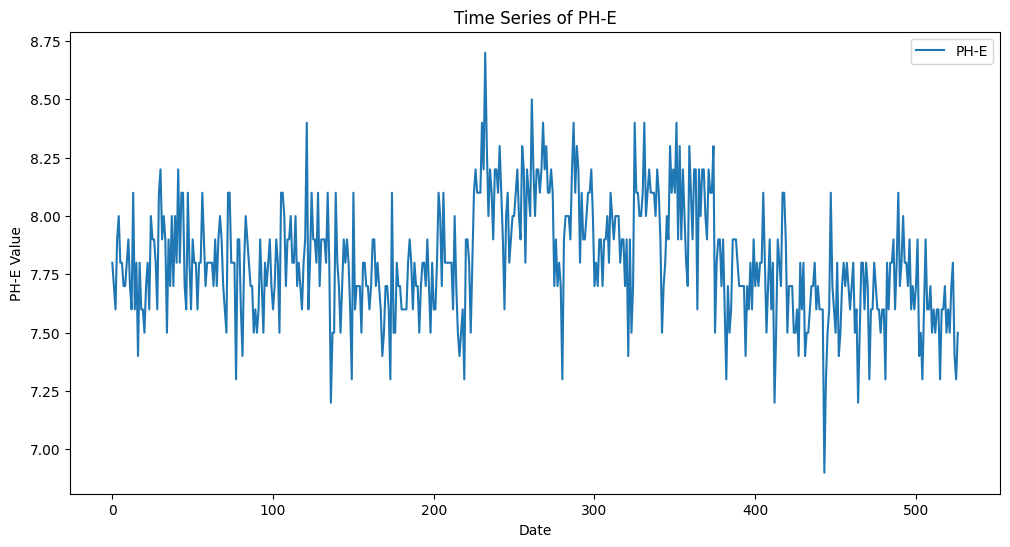

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data['PH-E'], label='PH-E')
plt.title('Time Series of PH-E')
plt.xlabel('Date')
plt.ylabel('PH-E Value')
plt.legend()
plt.show()

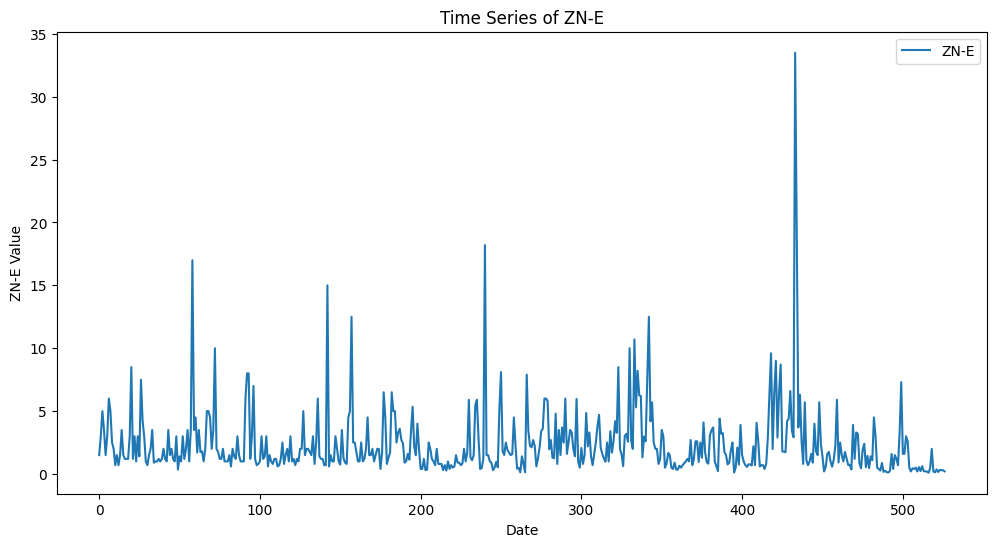

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(data['ZN-E'], label='ZN-E')
plt.title('Time Series of ZN-E')
plt.xlabel('Date')
plt.ylabel('ZN-E Value')
plt.legend()
plt.show()

#### Seasonal Decomposition of Time Series (STL

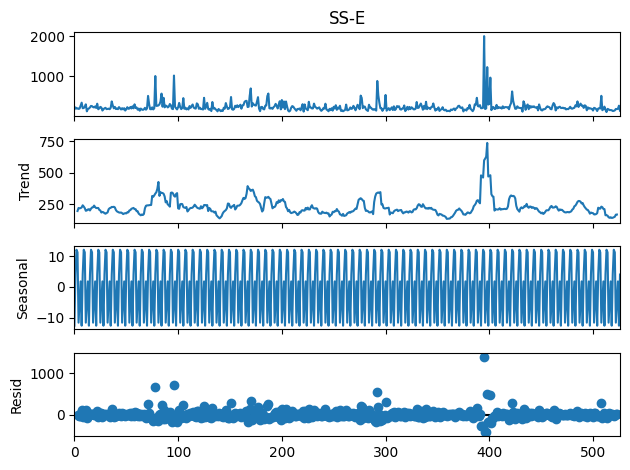

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['SS-E'], period=7)
result.plot()
plt.show()

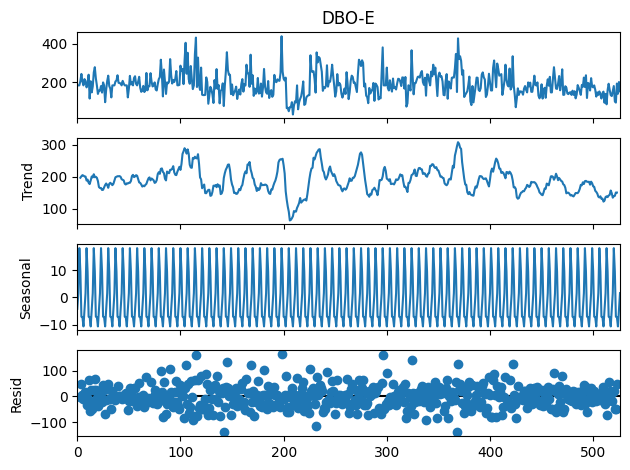

In [35]:
result = seasonal_decompose(data['DBO-E'], period=7)
result.plot()
plt.show()

### Observed = Trend + Seasonal + Residual

##### Trend: Reveals the long-term behavior or direction of the data.
##### Seasonal: Captures the regular, repetitive variations over a specific time period.
#####  Residual: Represents the random fluctuations or noise that cannot be explained by the trend or seasonal patterns.

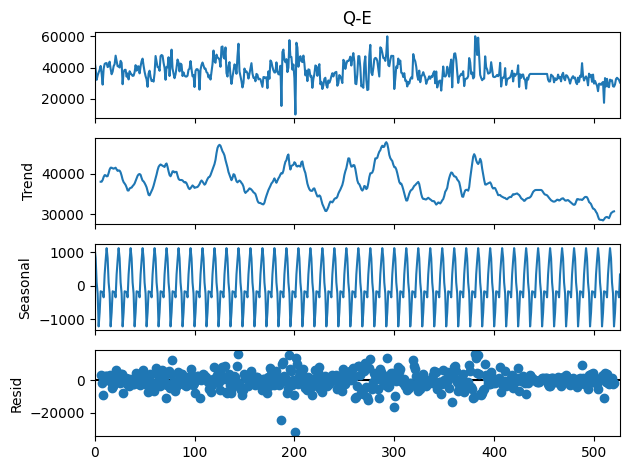

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Q-E'], model='additive', period=12)  # Assuming a seasonal period of 12 (monthly data)
result.plot()
plt.show()



#### Autocorrelation and Partial Autocorrelation Analysis

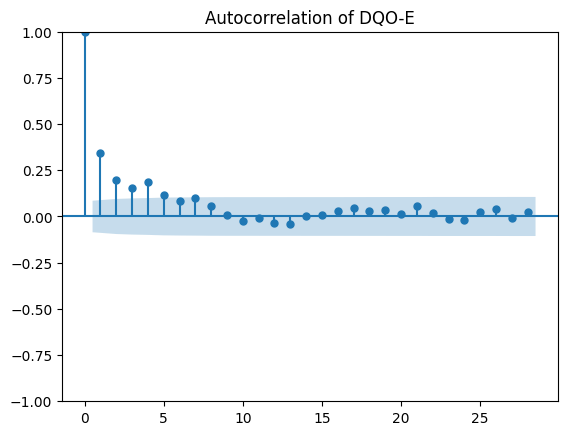

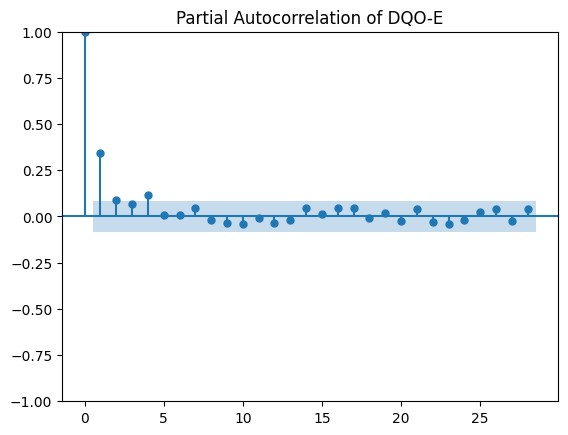

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['DQO-E'])
plt.title('Autocorrelation of DQO-E')
plt.show()

plot_pacf(data['DQO-E'])
plt.title('Partial Autocorrelation of DQO-E')
plt.show()


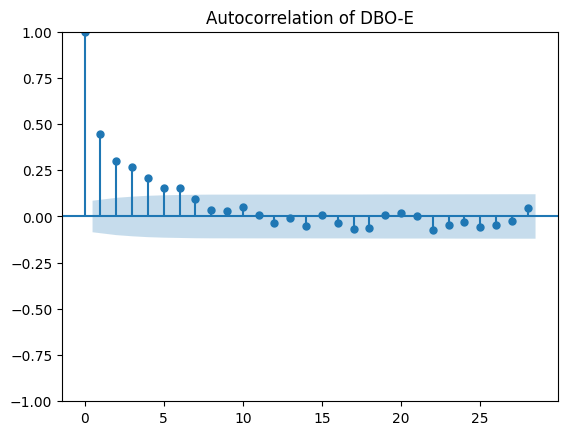

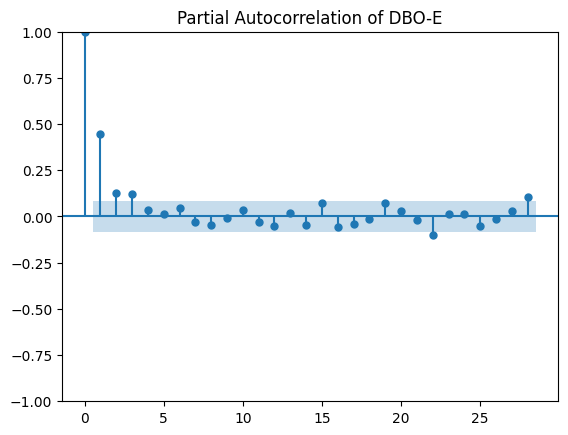

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['DBO-E'])
plt.title('Autocorrelation of DBO-E')
plt.show()

plot_pacf(data['DBO-E'])
plt.title('Partial Autocorrelation of DBO-E')
plt.show()


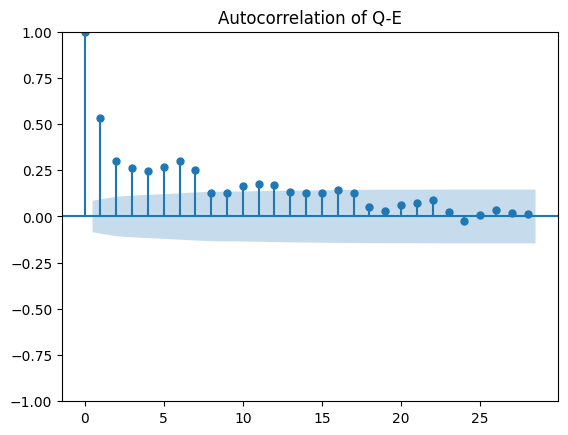

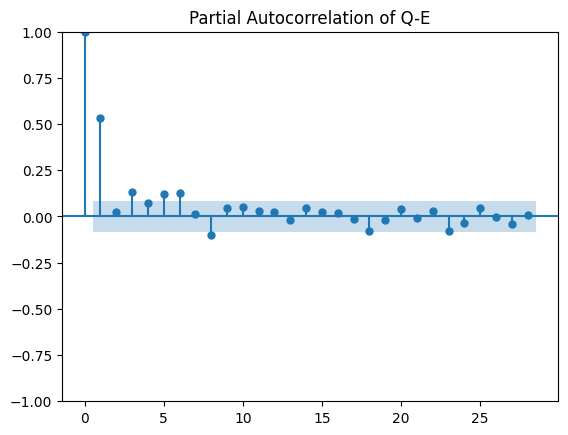

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Q-E'])
plt.title('Autocorrelation of Q-E')
plt.show()

plot_pacf(data['Q-E'])
plt.title('Partial Autocorrelation of Q-E')
plt.show()

### Normalization

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# scaling
scaler = StandardScaler()

In [42]:
data_normalized = data_imputed.drop('Date', axis=1)
data_normalized[data_normalized.columns] = scaler.fit_transform(data_normalized)

In [43]:
data_normalized.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1.046367,-0.313861,-0.040892,-0.670113,0.001853,-0.452559,0.395095,-0.031100,1.600361,0.308849,...,1.300168,-0.300578,0.022717,0.560195,0.077459,0.221626,-0.122941,0.211785,-0.201441,0.112392
1,0.271368,0.233764,-0.447493,-0.347962,0.302778,-0.098800,0.631104,0.712188,2.994449,-0.573338,...,2.821545,-0.367485,0.171754,0.479962,-0.301267,1.144978,-0.370372,0.222929,0.386712,0.204911
2,-0.765883,0.963930,-0.854094,0.049795,1.013296,-0.305160,0.688071,-0.439908,0.474952,-0.573338,...,1.011364,-0.495604,-0.024348,0.571657,0.279295,-1.240347,0.209811,-0.189403,-0.029896,-0.142035
3,-0.339381,0.416306,0.365710,0.273328,1.514838,-0.260940,0.338127,-0.031100,2.411467,-0.132244,...,0.887591,-0.393109,0.446296,0.537271,0.478863,0.418266,0.201279,0.534964,0.080383,0.204911
4,-0.049195,-0.313861,0.772311,0.881470,0.745807,-0.378860,0.273022,-0.216921,1.600361,0.308849,...,1.609601,-0.260718,0.328635,0.571657,0.159100,0.307122,0.471462,0.078055,-0.176934,0.089262


### Correlation

In [44]:
correlation_matrix = data_normalized.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

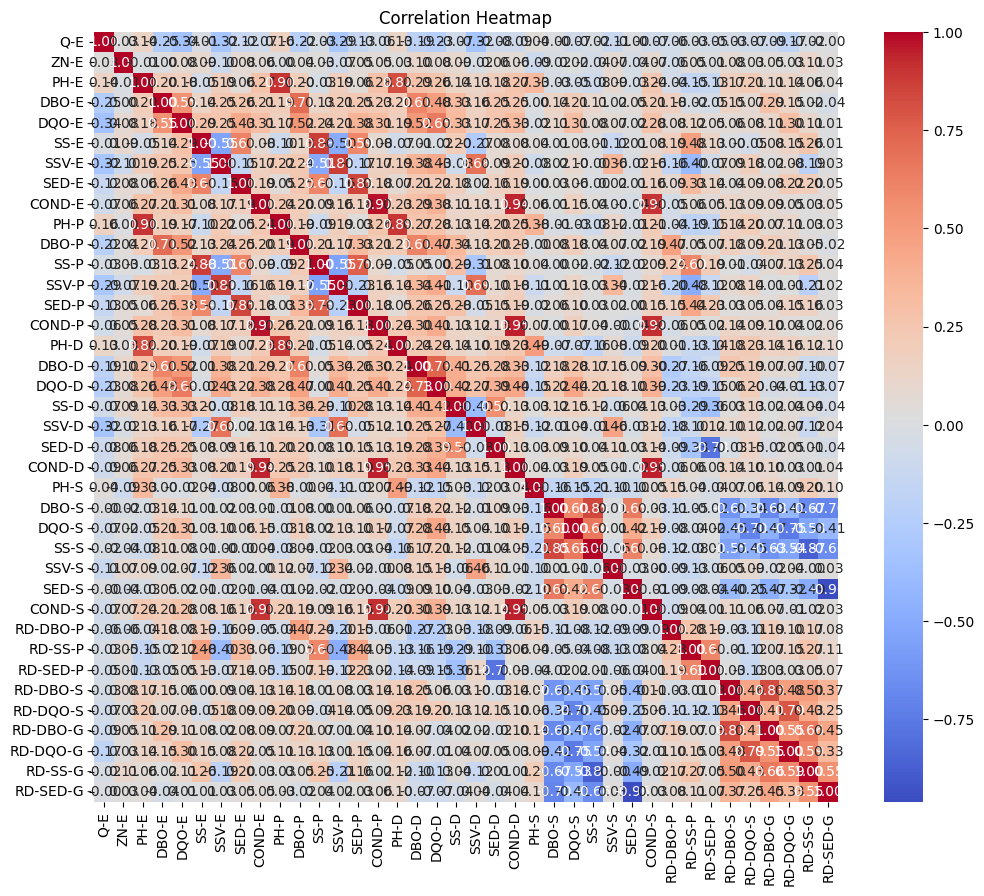

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

In [46]:
min_correlation = correlation_matrix.min().min()
feature_to_drop = correlation_matrix.min().idxmin()

In [47]:
data_normalized = data_normalized.drop(columns=[feature_to_drop])

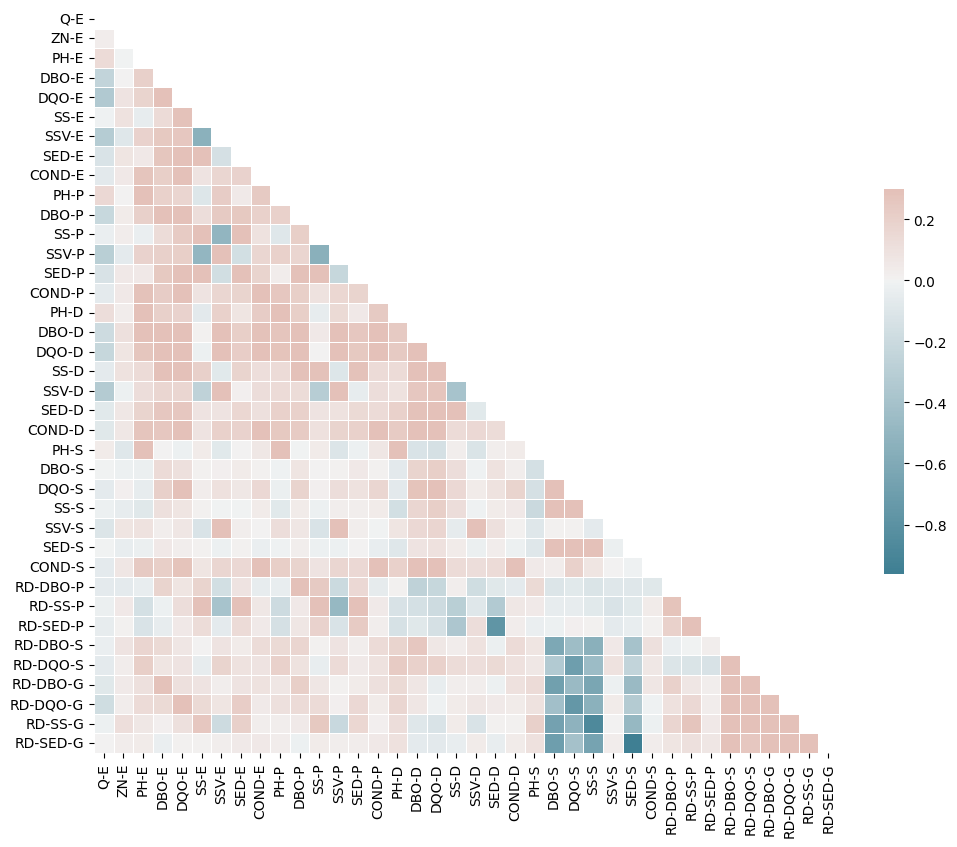

In [48]:
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [49]:
print(f"The feature '{feature_to_drop}' with correlation {min_correlation:.2f} was dropped.")

The feature 'SED-S' with correlation -0.96 was dropped.


#### Feature Selection
<!--using VarianceThreshold  -->

In [50]:
from sklearn.feature_selection import VarianceThreshold

In [51]:
numeric_data = data.select_dtypes(include='number')

In [52]:
selector = VarianceThreshold(threshold=0.1)

In [53]:
selected_features = selector.fit_transform(numeric_data)

In [54]:
selected_indices = selector.get_support(indices=True)

In [55]:
selected_columns = numeric_data.columns[selected_indices]

In [56]:
selected_data = pd.DataFrame(selected_features, columns=selected_columns)

In [57]:
print(selected_features)

[[4.4101e+04 1.5000e+00 1.8250e+02 ... 7.9400e+01 8.7300e+01 9.9600e+01]
 [3.9024e+04 3.0000e+00 1.8250e+02 ... 7.9500e+01 9.2100e+01 1.0000e+02]
 [3.2229e+04 5.0000e+00 1.8250e+02 ... 7.5800e+01 8.8700e+01 9.8500e+01]
 ...
 [3.2922e+04 3.0000e-01 1.3900e+02 ... 7.7100e+01 8.8900e+01 9.9000e+01]
 [3.2190e+04 3.0000e-01 2.0000e+02 ... 8.7000e+01 8.9500e+01 9.9800e+01]
 [3.0488e+04 2.1000e-01 1.5200e+02 ... 8.1700e+01 8.6400e+01 9.9700e+01]]


In [58]:
print(data.columns)

Index(['Date', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')


####  Feature Importance from K-Means Clustering Algorithm

In [59]:
from sklearn.cluster import KMeans

In [60]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year

kmeans = KMeans(n_clusters=3,n_init=10)  
cluster_labels = kmeans.fit_predict(data[['Month', 'Day', 'Year']])

In [90]:
cluster_centers = kmeans.cluster_centers_

In [62]:
# range for each feature across cluster
feature_ranges = cluster_centers.max(axis=0) - cluster_centers.min(axis=0)


In [63]:
# sorting features
important_features = sorted(range(len(feature_ranges)), key=lambda i: feature_ranges[i], reverse=True)

In [64]:
print(f"The most important features are: {important_features}")

The most important features are: [1, 0, 2]


In [65]:
important_feature_names = data.columns[important_features]
print(f"The most important features are: {important_feature_names}")

The most important features are: Index(['Q-E', 'Date', 'ZN-E'], dtype='object')


In [66]:
data_types = data.dtypes
print("\nData Types:")
print(data_types)


Data Types:
Date        datetime64[ns]
Q-E                float64
ZN-E               float64
PH-E               float64
DBO-E              float64
DQO-E              float64
SS-E               float64
SSV-E              float64
SED-E              float64
COND-E               int64
PH-P               float64
DBO-P              float64
SS-P                 int64
SSV-P              float64
SED-P              float64
COND-P               int64
PH-D               float64
DBO-D              float64
DQO-D              float64
SS-D               float64
SSV-D              float64
SED-D              float64
COND-D               int64
PH-S               float64
DBO-S              float64
DQO-S              float64
SS-S               float64
SSV-S              float64
SED-S              float64
COND-S             float64
RD-DBO-P           float64
RD-SS-P            float64
RD-SED-P           float64
RD-DBO-S           float64
RD-DQO-S           float64
RD-DBO-G           float64
RD-DQO-G       

#### Dimensionality Reduction with PCA

In [68]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

reference_date = data['Date'].min()  
numeric_dates = (data['Date'] - reference_date).dt.days.values.reshape(-1, 1)
scaled_data = np.hstack((numeric_dates, scaled_numeric_data))

In [69]:
# scaling
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)
scaled_data = np.hstack((numeric_dates, scaled_numeric_data))

In [70]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_data)

In [71]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [9.98929195e-01 1.89826342e-04]


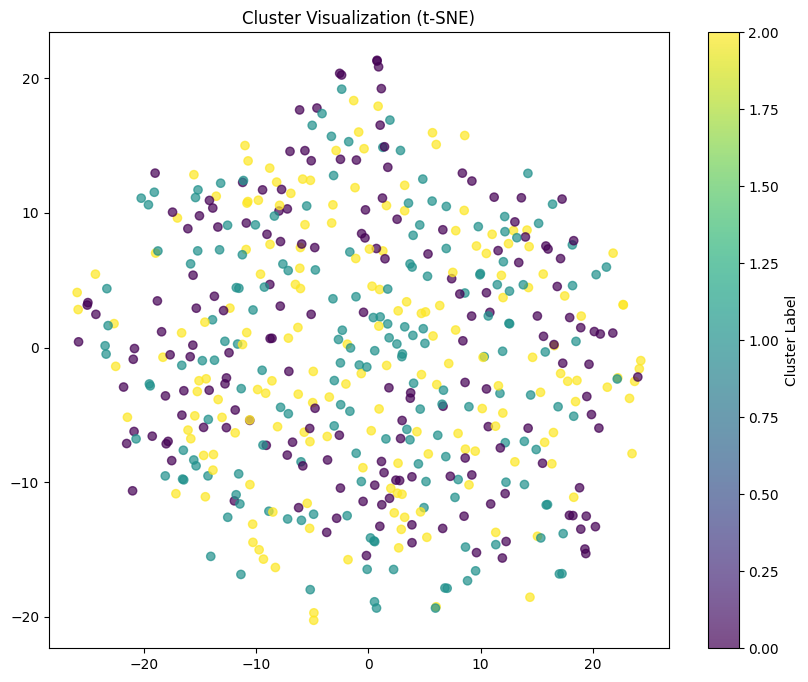

In [72]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_numeric_data)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('Cluster Visualization (t-SNE)')
plt.show()

####  Analyzing Cluster Characteristics

In [73]:
from sklearn.cluster import KMeans

In [74]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

In [75]:
centroids = kmeans.cluster_centers_

In [76]:
for i, centroid in enumerate(centroids):
    print(f'Centroid of Cluster {i+1}: {centroid}')

Centroid of Cluster 1: [ 5.39088235e+02 -3.96231396e-01 -3.75930577e-02 -5.31204776e-01
 -2.44408100e-01 -8.38520506e-02  3.09754438e-02  2.97173985e-02
  6.88309301e-02 -2.44099339e-01 -4.66956272e-01 -2.27492333e-01
 -1.20162014e-02 -3.56966046e-02 -1.09370926e-02 -2.68296566e-01
 -4.10995729e-01 -3.38418177e-01 -1.76100727e-01 -2.69562028e-01
  2.01979528e-01 -1.86878213e-01 -2.59145668e-01 -1.03095844e-01
 -4.59347452e-02 -1.13584416e-01 -1.19422260e-01  2.96322977e-01
 -6.47833003e-02 -2.79635174e-01  8.48732617e-03  1.41287961e-01
  1.63204235e-01 -1.85592689e-01  5.18270054e-02 -9.41763665e-02
  9.14798893e-02  1.24691348e-01  7.13067104e-02]
Centroid of Cluster 2: [ 1.08322222e+02  2.03758092e-01 -1.53120990e-02 -1.28988504e-01
  1.24697826e-01  8.17070576e-02  7.01219720e-02 -1.73767667e-01
  3.40805501e-02  3.49664286e-03 -2.22913472e-01  7.80815191e-02
  9.39211807e-02 -6.82563694e-02  1.18617331e-01  2.90322388e-02
 -3.05125022e-01  3.33541781e-01  2.85285361e-01  1.3105152

### Performance matrics of cluster

In [88]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


reference_date = data['Date'].min()  
numeric_dates = (data['Date'] - reference_date).dt.days.values.reshape(-1, 1)

scaled_numeric_data = scaler.fit_transform(numeric_data)

scaled_data = np.hstack((numeric_dates, scaled_numeric_data))
# clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
cluster_labels = kmeans.fit_predict(scaled_data)

#  Silhouette Score
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

#  Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(scaled_data, cluster_labels)


In [89]:
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.5751173259745284
Davies-Bouldin Index: 0.5151980016535557
